# 4章 SymPyで代数と式を計算する

## 4.1 式の記号と記号演算を定義する

In [1]:
from sympy import Symbol

x = Symbol('x')
x + x + 1  

2*x + 1

In [2]:
x.name

'x'

In [3]:
from sympy import symbols

x, y, z = symbols('x,y,z')

In [4]:
x = Symbol('x')
y = Symbol('y')
s = x * y + x * y
s

2*x*y

In [5]:
p = x * (x + x)
p

2*x**2

In [6]:
p = (x + 2) * (x + 3)
p

(x + 2)*(x + 3)

### 4.2.1 式の因数分解と展開

In [3]:
from sympy import Symbol
from sympy import factor

x = Symbol('x')
y = Symbol('y')

expr = x ** 2 - y ** 2
factor(expr)

(x - y)*(x + y)

In [5]:
from sympy import expand

factors = factor(expr)
expand(factors)

x**2 - y**2

In [8]:
expr = x ** 3 + 3 * x ** 2 * y + 3 * x * y ** 2 + y ** 3
factors = factor(expr)
factors

(x + y)**3

In [ ]:
expr = x + y + x * y
factor(expr)

### 4.2.2 プリティプリント

In [4]:
from sympy import Symbol
from sympy import factor

x = Symbol('x')
y = Symbol('y')

expr = x*x + 2*x*y + y*y

In [5]:
print(expr)

x**2 + 2*x*y + y**2


In [8]:
from sympy import pprint

expr = 1 + 2*x + 2*x**2
pprint(expr, use_unicode=True)

   2          
2⋅x  + 2⋅x + 1


In [11]:
from sympy import init_printing

init_printing(order='rev-lex')
pprint(expr, use_unicode=True)

             2
1 + 2⋅x + 2⋅x 


#### 4.2.2.1 級数を出力する

In [21]:
'''
Print the series:

x + x**2 + z**3 + ... + x*n
    ----   ----         ---
     2      3            n

and calculate its value at a certain value of x.
'''
from sympy import Symbol, pprint, init_printing

def print_series(n):
    #initialize printing sysytem with reverse order
    init_printing(order='rev-lex')
    x = Symbol('x')
    series = x
    
    for i in range(2, n+1):
        series = series + (x**i)/i
    
    pprint(series)
 
if __name__ == '__main__':
    n = input('Enter the number of terms you want in the series: ')
    print_series(int(n))

Enter the number of terms you want in the series: 5
     2    3    4    5
    x    x    x    x 
x + ── + ── + ── + ──
    2    3    4    5 


### 4.2.3 値に代入する

In [4]:
from sympy import Symbol

x = Symbol('x')
y = Symbol('y')

x**2 + x*y + x*y + y**2

x**2 + 2*x*y + y**2

In [8]:
x = Symbol('x')
y = Symbol('y')

expr = x**2 + x*y + x*y + y**2
res = expr.subs({x: 1, y: 2})

print(res)

9


In [10]:
expr.subs({x: 1-y})

y**2 + 2*y*(-y + 1) + (-y + 1)**2

In [14]:
from sympy import simplify

expr_subs = expr.subs({x: 1-y})
simplify(expr_subs)

1

#### 4.2.3.1 級数の値を計算する

In [20]:
'''
Print the series:

x + x**2 + z**3 + ... + x*n
    ----   ----         ---
     2      3            n

and calculate its value at a certain value of x.
'''
from sympy import Symbol, pprint, init_printing

def print_series(n, x_value):
    #initialize printing sysytem with reverse order
    init_printing(order='rev-lex')
    x = Symbol('x')
    series = x
    
    for i in range(2, n+1):
        series = series + (x**i)/i
    
    pprint(series)
    
    # evaluate the series at x_value
    series_value = series.subs({x:x_value})
    print('Value of the series at {0}: {1}'.format(x_value, series_value))
 
if __name__ == '__main__':
    n = input('Enter the number of terms you want in the series: ')
    x_value = input('Enter the value of x at which you want to evaluate the series: ')
    print_series(int(n), float(x_value))


Enter the number of terms you want in the series: 5
Enter the value of x at which you want to evaluate the series: 1.2
     2    3    4    5
    x    x    x    x 
x + ── + ── + ── + ──
    2    3    4    5 
Value of the series at 1.2: 3.51206400000000


### 4.2.4 文字列を数式に変換する

In [26]:
from sympy import sympify

expr = input('Enter a mathematical expression: ')
expr = sympify(expr)

2*expr

Enter a mathematical expression: x*y


In [ ]:
from sympy import sympify
from sympyfy.core.sympify import SympifyError

expr = input('Enter a mathematical expression: ')
try:
    expr = sympify(expr)
except SympifyError:
    print('invalid input')

2*expr

#### 4.2.4.1 数式乗算器

In [1]:

'''
Product of two expressions
'''

from sympy import expand, sympify
from sympy.core.sympify import SympifyError
def product(expr1, expr2):
    prod = expand(expr1*expr2)
    print(prod)

if __name__=='__main__':
    expr1 = input('Enter the first expression: ')
    expr2 = input('Enter the second expression: ')
    try:
        expr1 = sympify(expr1)
        expr2 = sympify(expr2)
    except SympifyError:
        print('Invalid input')
    else:
        product(expr1, expr2)

Enter the first expression: 5
Enter the second expression: 3
15


## 4.3 方程式を解く

In [4]:
from sympy import Symbol, solve
x = Symbol('x')
expr = x - 5 - 7
solve(expr)

[12]

### 4.3.1 2次方程式を解く

In [5]:
from sympy import Symbol, solve
x = Symbol('x')
expr = x**2 + 5*x + 4
solve(expr, dict=True)

[{x: -4}, {x: -1}]

In [7]:
x = Symbol('x')
expr = x**2 + x + 1
solve(expr, dict=True)

[{x: -1/2 - sqrt(3)*I/2}, {x: -1/2 + sqrt(3)*I/2}]

### 4.3.2 1変数を他の変数について解く

In [10]:
x = Symbol('x')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')

expr = a*x*x + b*x + c
solve(expr, x, dict=True)

[{x: (-b + sqrt(-4*a*c + b**2))/(2*a)}, {x: -(b + sqrt(-4*a*c + b**2))/(2*a)}]

In [11]:
from sympy import Symbol, solve, pprint

s = Symbol('s')
u = Symbol('u')
t = Symbol('t')
a = Symbol('a')

expr = u*t + (1/2)*a*t*t - s
t_expr = solve(expr, t, dict=True)
pprint(t_expr)

⎡⎧           ______________⎫  ⎧    ⎛       ______________⎞ ⎫⎤
⎢⎪          ╱            2 ⎪  ⎪    ⎜      ╱            2 ⎟ ⎪⎥
⎢⎨   -u + ╲╱  2.0⋅a⋅s + u  ⎬  ⎨   -⎝u + ╲╱  2.0⋅a⋅s + u  ⎠ ⎬⎥
⎢⎪t: ──────────────────────⎪, ⎪t: ─────────────────────────⎪⎥
⎣⎩             a           ⎭  ⎩               a            ⎭⎦


### 4.3.3 連立方程式を解く

In [14]:
x = Symbol('x')
y = Symbol('y')

expr1 = 2*x + 3*y - 6
expr2 = 3*x + 2*y - 12

solve((expr1, expr2), dict=True)

[{x: 24/5, y: -6/5}]

In [20]:
soln = solve((expr1, expr2), dict=True)
print(soln)
soln = soln[0]
print(soln)
print(expr1.subs({x: soln[x], y: soln[y]}))
print(expr2.subs({x: soln[x], y: soln[y]}))

[{x: 24/5, y: -6/5}]
{x: 24/5, y: -6/5}
0
0


## 4.4 SymPyを使ってプロットする

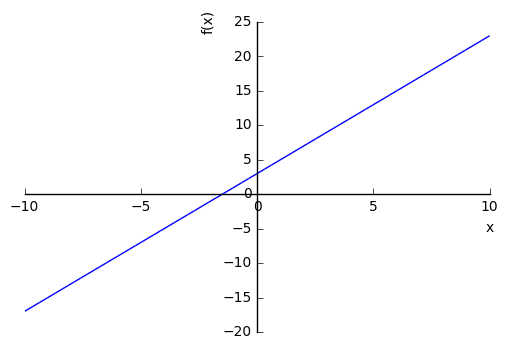

In [1]:
from sympy.plotting import plot
from sympy import Symbol

x = Symbol('x')
plot(2*x+3)

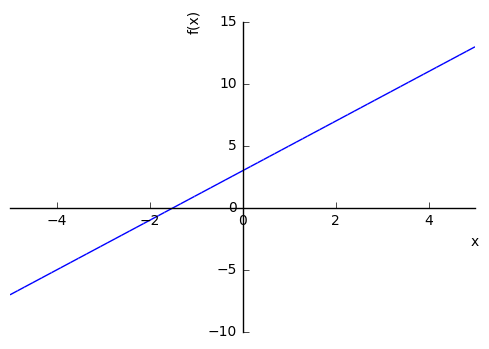

In [2]:
plot((2*x+3), (x, -5, 5))

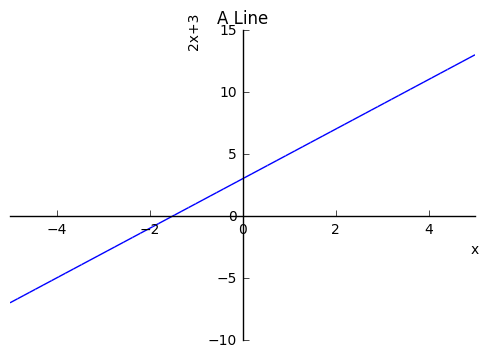

In [3]:
plot(2*x+3, (x, -5, 5), title='A Line', xlabel='x', ylabel='2x+3')

### 4.4.1 ユーザが入力した式をプロットする

In [8]:
from sympy import sympify, solve

expr = input('Enter an expression')

expr = sympify(expr)
y = Symbol('y')
solve(expr, y)

Enter an expression2*x + 3*y - 6
2*x + 3*y - 6


[-2*x/3 + 2]

In [9]:
expr = input('Enter an expression')

expr = sympify(expr)
y = Symbol('y')
solutions = solve(expr, y)
solutions[0]

Enter an expression2*x + 3*y - 6


-2*x/3 + 2

Enter your expression in terms of x and y:2*x + 3*y - 6


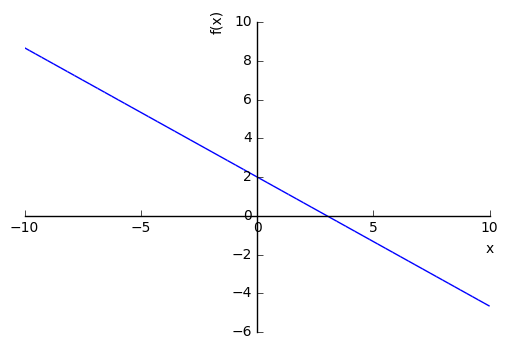

In [12]:
'''
Plot the graph of an input expression
'''

from sympy import Symbol, sympify, solve
from sympy.plotting import plot

def plot_expression(expr):
    y = Symbol('y')
    solutions = solve(expr, y)
    expr_y = solutions[0]
    plot(expr_y)
    
if __name__ == '__main__':
    expr = input('Enter your expression in terms of x and y:')
    try:
        expr = sympify(expr)
    except SympifyError:
        print('Invalid input')
    else:
        plot_expression(expr)

### 4.4.2 複数の関数をプロットする

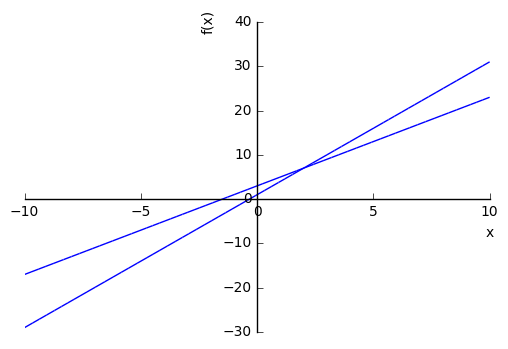

In [13]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(2*x+3, 3*x+1)

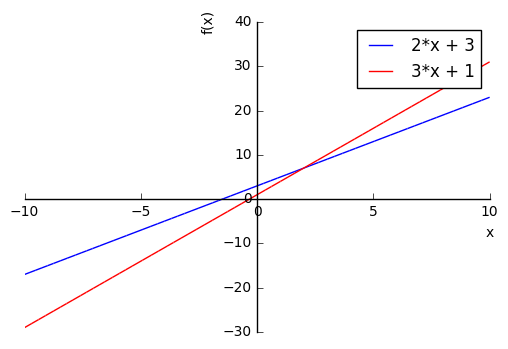

In [16]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
p = plot(2*x+3, 3*x+1, legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()